In [1]:
import matplotlib.pylab as plt
import numpy as np
from astropy import units as u
from astropy.io import fits
import aplpy
import matplotlib.patheffects as pe
from astropy.wcs import WCS

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [44]:
def figure_layout( fig, c_unit, fontcolor='white', colorbar=True):
    fig.set_nan_color('0.95')
    
    # beam 
    fig.add_beam()
    fig.beam.set_color('#E31A1C')
    
    # 
    fig.axis_labels.set_font(size=15)
    fig.axis_labels.set_xtext('Right Ascension (ICRS)')
    fig.axis_labels.set_ytext('Declination (ICRS)')
    #fig.axis_labels.set_ypad(pad=-1.5)
    fig.tick_labels.set_yformat('d.ddd')
    fig.tick_labels.set_xformat('d.ddd')

    # Scale bar
    ang_sep = (12*u.arcsec).to(u.rad)
    fig.add_scalebar(ang_sep)
    fig.scalebar.set_label("$12''$")
    fig.scalebar.set_font(size=22)
    fig.scalebar.set_linewidth(3) 
    fig.scalebar.set_color(fontcolor)
    
    if colorbar:
        fig.add_colorbar()
        fig.colorbar.set_location('right')
        fig.colorbar.set_width(0.1)
        fig.colorbar.set_pad(0.05)
        fig.colorbar.set_axis_label_text(c_unit)
        fig.colorbar.set_label_properties(size=10)
    
    # Ticks
    fig.ticks.set_color(fontcolor)
    fig.ticks.set_tick_direction('in')
    #fig.ticks.set_minor_frequency(4)
    #fig.ticks.set_yspacing(0.006)  # degrees
    

### First: Create Moment0 (=integrated intensity) map of 12CO data

In [3]:
!bettermoments /Users/kristina/Hamburgers/Draculas_Chivito/SMA/DraChi.briggs0.12CO.LSRK.im.image.fits -method zeroth -firstchannel 22 -lastchannel 50 -clip 2

#-smooththreshold 10

# -clip 2: mask all pixel with < 2sigma_rms
# -firstchannel 22: start from channel 22
# -lastchannel 50: stop at channel 50


Loading up data...
Defining channel-based mask...
Estimating noise in the data...
Estimated RMS: 9.93e-02.
Calculating threshold-based mask...
Masking the data...
Calculating maps...
Checking for NaNs in error maps.
Saving moment maps...


INFO: Auto-setting vmin to -1.863e+03 [aplpy.core]


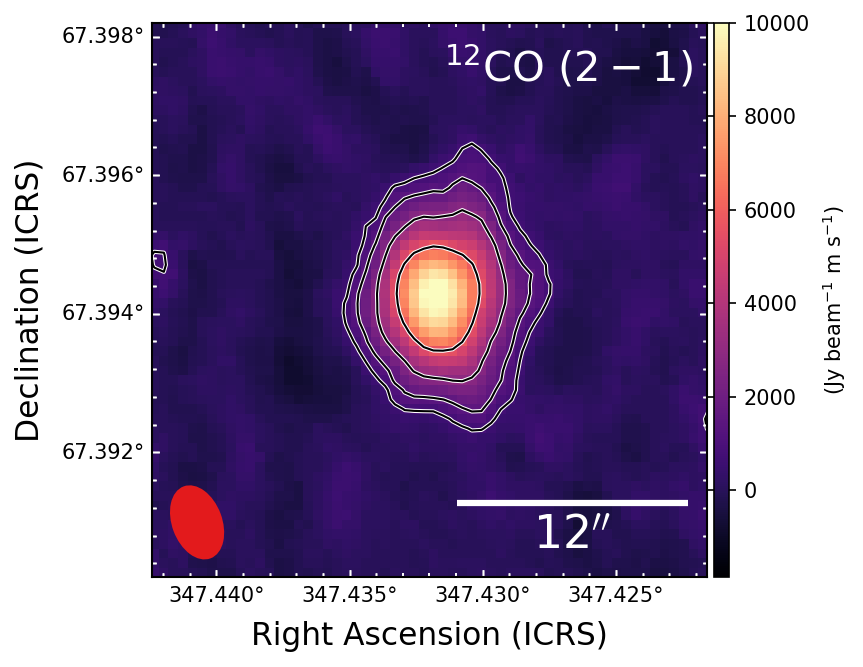

In [45]:
color_table='magma'
fig = plt.figure(dpi=150)

mom0_12CO = fits.open('/Users/kristina/Hamburgers/Draculas_Chivito/SMA/DraChi.briggs0.12CO.LSRK.im.image_M0.fits')

f_mom0_12CO = aplpy.FITSFigure(mom0_12CO, figure=fig)#, slices=[0],

vmin, vmax = np.nanpercentile(mom0_12CO[0].data, [2, 98])
f_mom0_12CO.show_colorscale(cmap=color_table, vmax=10000) 

#rms = 9.93e-02 # obtained from bettermoments, see above
rms = 2.41e2

# adopt the default layout
figure_layout( f_mom0_12CO, c_unit='(Jy beam$^{-1}$ m s$^{-1}$)')

c_levs = np.array([3, 6, 12, 24])*rms
f_mom0_12CO.show_contour(colors='white', linewidths=2., levels=c_levs)
f_mom0_12CO.show_contour(colors='black', linewidths=1., levels=c_levs)

# got the coordinates of the center from CASAviewer
f_mom0_12CO.recenter(347.432,67.3942,width=0.008,height=0.008)

f_mom0_12CO.add_label(0.75,0.92, '$^{12}$CO $(2-1)$', relative=True, color='white', size=20)


fig.savefig('../plots/DraChi_mom0_12CO_withcontours.pdf', bbox_inches='tight')

INFO: Auto-setting vmin to -1.770e+03 [aplpy.core]


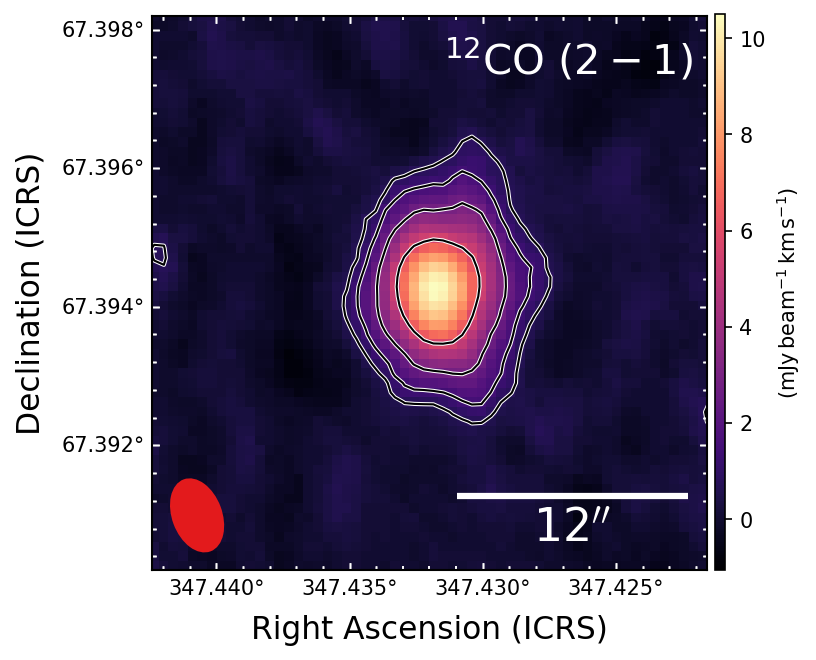

In [46]:
color_table='magma'
fig = plt.figure(dpi=150)

mom0_12CO = fits.open('/Users/kristina/Hamburgers/Draculas_Chivito/SMA/DraChi.briggs0.12CO.LSRK.im.image_M0.fits')

f_mom0_12CO = aplpy.FITSFigure(mom0_12CO, figure=fig)#, slices=[0],

vmin, vmax = np.nanpercentile(mom0_12CO[0].data, [2, 98])
f_mom0_12CO.show_colorscale(cmap=color_table, vmax=10000) 

#rms = 9.93e-02 # obtained from bettermoments, see above
rms = 2.41e2

# adopt the default layout
figure_layout( f_mom0_12CO, c_unit='(Jy beam$^{-1}$ m s$^{-1}$)', colorbar=False)

c_levs = np.array([3, 6, 12, 24])*rms
f_mom0_12CO.show_contour(colors='white', linewidths=2., levels=c_levs)
f_mom0_12CO.show_contour(colors='black', linewidths=1., levels=c_levs)

# got the coordinates of the center from CASAviewer
f_mom0_12CO.recenter(347.432,67.3942,width=0.008,height=0.008)

f_mom0_12CO.add_label(0.75,0.92, '$^{12}$CO $(2-1)$', relative=True, color='white', size=20)


im = plt.imshow(mom0_12CO[0].data/1000., cmap=color_table)
cb_ax = fig.add_axes([0.81, 0.11, 0.01, 0.772]) #right, top, thickness, length
cbar = fig.colorbar(im, cax=cb_ax)
cbar.set_label('$(\mathrm{mJy\,beam^{-1}\,km\,s^{-1}})$', fontsize=10)

fig.savefig('../plots/DraChi_mom0_12CO_withcontours.pdf', bbox_inches='tight')


INFO: Auto-setting vmin to -1.825e+03 [aplpy.core]


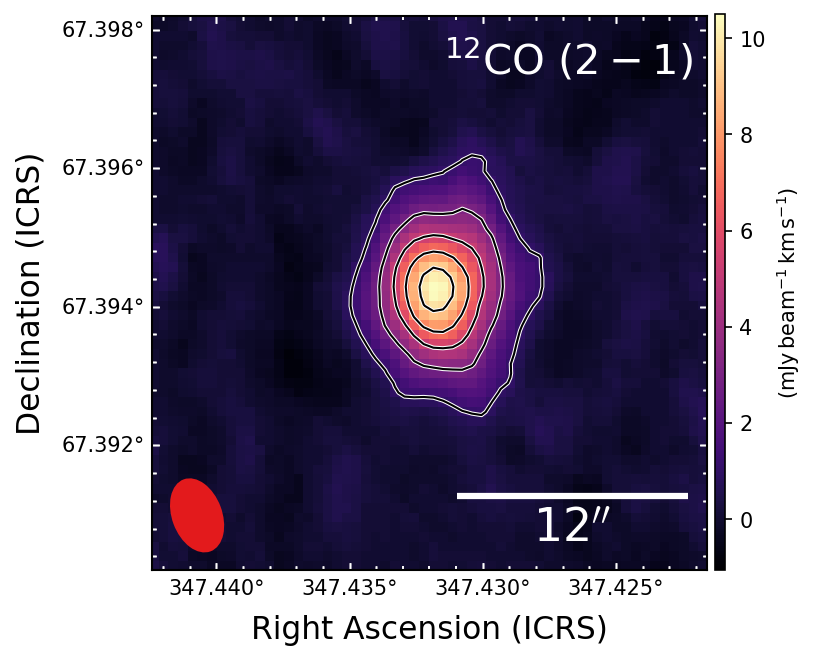

In [47]:
color_table='magma'
fig = plt.figure(dpi=150)

mom0_12CO = fits.open('/Users/kristina/Hamburgers/Draculas_Chivito/SMA/DraChi.briggs0.12CO.LSRK.im.image_M0.fits')

f_mom0_12CO = aplpy.FITSFigure(mom0_12CO, figure=fig)#, slices=[0],

vmin, vmax = np.nanpercentile(mom0_12CO[0].data, [2, 98])
f_mom0_12CO.show_colorscale(cmap=color_table, vmax=10000) 

max_em = 1.05e4 # mJy/beam m/s from mom0 map
c_levs = np.arange(0.1,1.2,0.2)*max_em

# adopt the default layout
figure_layout( f_mom0_12CO, c_unit='(Jy beam$^{-1}$ m s$^{-1}$)', colorbar=False)

f_mom0_12CO.show_contour(colors='white', linewidths=2., levels=c_levs)
f_mom0_12CO.show_contour(colors='black', linewidths=1., levels=c_levs)

# got the coordinates of the center from CASAviewer
f_mom0_12CO.recenter(347.432,67.3942,width=0.008,height=0.008)

f_mom0_12CO.add_label(0.75,0.92, '$^{12}$CO $(2-1)$', relative=True, color='white', size=20)


im = plt.imshow(mom0_12CO[0].data/1000., cmap=color_table)
cb_ax = fig.add_axes([0.81, 0.11, 0.01, 0.772]) #right, top, thickness, length
cbar = fig.colorbar(im, cax=cb_ax)
cbar.set_label('$(\mathrm{mJy\,beam^{-1}\,km\,s^{-1}})$', fontsize=10)

fig.savefig('../plots/DraChi_mom0_12CO_withcontours_2.pdf', bbox_inches='tight')

INFO: Auto-setting vmin to -1.896e+03 [aplpy.core]


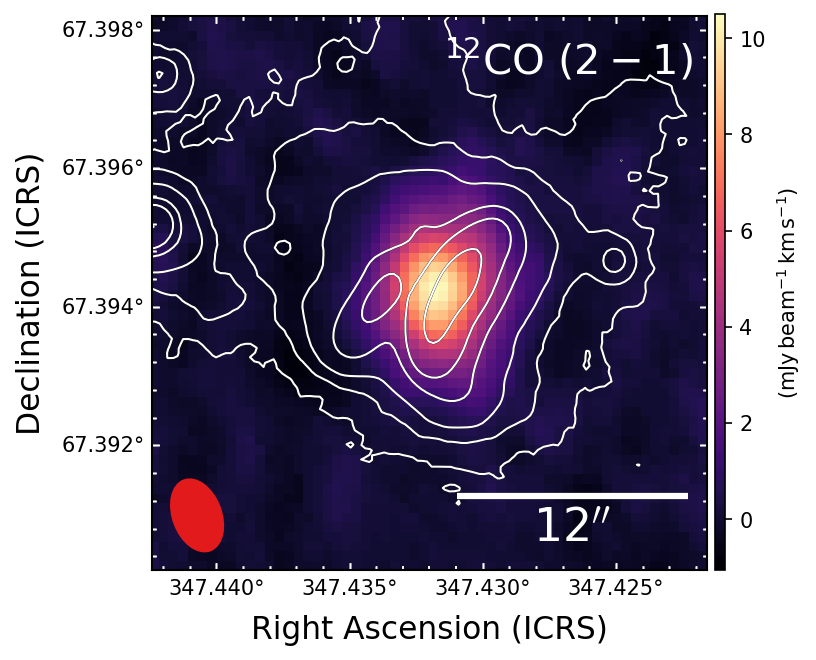

In [48]:
color_table='magma'
fig = plt.figure(dpi=150)

mom0_12CO = fits.open('/Users/kristina/Hamburgers/Draculas_Chivito/SMA/DraChi.briggs0.12CO.LSRK.im.image_M0.fits')

f_mom0_12CO = aplpy.FITSFigure(mom0_12CO, figure=fig)#, slices=[0],

vmin, vmax = np.nanpercentile(mom0_12CO[0].data, [2, 98])
f_mom0_12CO.show_colorscale(cmap=color_table, vmax=10000) 

max_em = 1.05e4 # mJy/beam m/s from mom0 map
c_levs = np.arange(0.1,1.2,0.2)*max_em

# adopt the default layout
figure_layout( f_mom0_12CO, c_unit='(Jy beam$^{-1}$ m s$^{-1}$)', colorbar=False)

rms = 17.
c_levs = np.array([4, 16, 40, 160, 400, 1600])*rms
f_mom0_12CO.show_contour('/Users/kristina/Hamburgers/Draculas_Chivito/Pan-STARRS_fits_files/cutout_rings.v3.skycell.2537.088.stk.g.unconv.fits', colors='black', linewidths=1.2, levels=c_levs, smooth=3, kernel='box')
f_mom0_12CO.show_contour('/Users/kristina/Hamburgers/Draculas_Chivito/Pan-STARRS_fits_files/cutout_rings.v3.skycell.2537.088.stk.g.unconv.fits', colors='white', linewidths=1., levels=c_levs, smooth=3, kernel='box')

#f_mom0_12CO.show_contour(colors='white', linewidths=2., levels=c_levs)
#f_mom0_12CO.show_contour(colors='black', linewidths=1., levels=c_levs)

# got the coordinates of the center from CASAviewer
f_mom0_12CO.recenter(347.432,67.3942,width=0.008,height=0.008)

f_mom0_12CO.add_label(0.75,0.92, '$^{12}$CO $(2-1)$', relative=True, color='white', size=20)


im = plt.imshow(mom0_12CO[0].data/1000., cmap=color_table)
cb_ax = fig.add_axes([0.81, 0.11, 0.01, 0.772]) #right, top, thickness, length
cbar = fig.colorbar(im, cax=cb_ax)
cbar.set_label('$(\mathrm{mJy\,beam^{-1}\,km\,s^{-1}})$', fontsize=10)

fig.savefig('../plots/DraChi_mom0_12CO_withcontours_3.pdf', bbox_inches='tight')


### Now: create Moment1 (=centroid velocity v_lsr) map of 12CO

In [7]:
!bettermoments /Users/kristina/Hamburgers/Draculas_Chivito/SMA/DraChi.briggs0.12CO.LSRK.im.image.fits -clip 5
# use the quadratic method (default), rather than calculating the classic mom1 map

# -clip 2: mask all pixel with < 2sigma_rms
# -firstchannel 22: start from channel 22
# -lastchannel 50: stop at channel 50


Loading up data...
Estimating noise in the data...
Estimated RMS: 9.93e-02.
Calculating threshold-based mask...
Masking the data...
Calculating maps...
Checking for NaNs in error maps.
Saving moment maps...


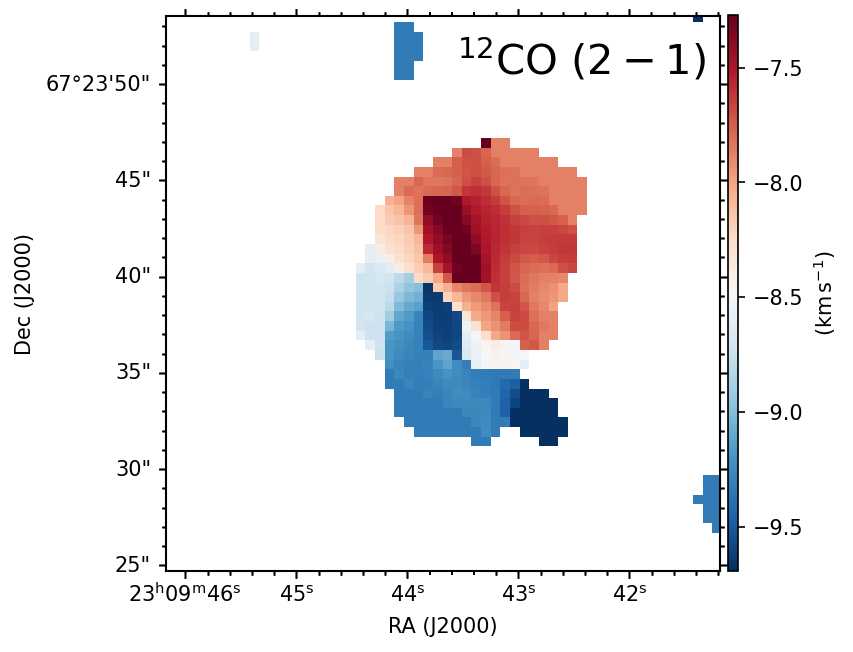

In [35]:
color_table='RdBu_r'
fig = plt.figure(dpi=150)

mom1_12CO = fits.open('/Users/kristina/Hamburgers/Draculas_Chivito/SMA/DraChi.briggs0.12CO.LSRK.im.image_v0.fits')

f_mom1_12CO = aplpy.FITSFigure(mom1_12CO, figure=fig)#, slices=[0],

vmin, vmax = np.nanpercentile(mom1_12CO[0].data, [2, 98])
f_mom1_12CO.show_colorscale(cmap=color_table, vmin=vmin, vmax=vmax) 

# got the coordinates of the center from CASAviewer
f_mom1_12CO.recenter(347.432,67.3942,width=0.008,height=0.008)

f_mom1_12CO.add_label(0.75,0.92, '$^{12}$CO $(2-1)$', relative=True, color='black', size=20)


im = plt.imshow(mom1_12CO[0].data/1000., cmap=color_table, vmin=vmin/1000, vmax=vmax/1000)
cb_ax = fig.add_axes([0.81, 0.11, 0.01, 0.772]) #right, top, thickness, length
cbar = fig.colorbar(im, cax=cb_ax)
cbar.set_label('$(\mathrm{km\,s^{-1}})$', fontsize=10)

fig.savefig('../plots/DraChi_mom1_12CO.pdf', bbox_inches='tight')


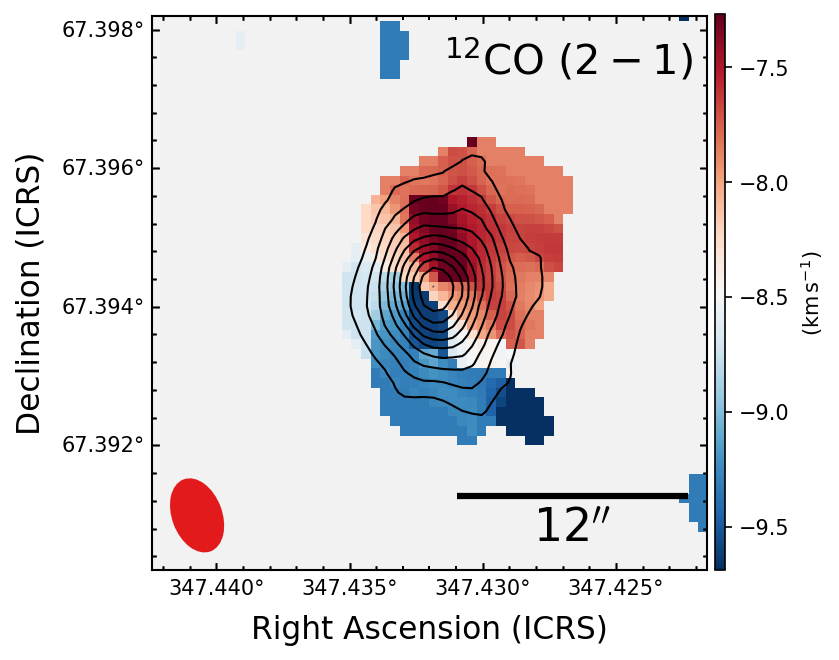

In [49]:
color_table='RdBu_r'
fig = plt.figure(dpi=150)

mom1_12CO = fits.open('/Users/kristina/Hamburgers/Draculas_Chivito/SMA/DraChi.briggs0.12CO.LSRK.im.image_v0.fits')

f_mom1_12CO = aplpy.FITSFigure(mom1_12CO, figure=fig)#, slices=[0],

vmin, vmax = np.nanpercentile(mom1_12CO[0].data, [2, 98])
f_mom1_12CO.show_colorscale(cmap=color_table, vmin=vmin, vmax=vmax) 

# adopt the default layout
figure_layout( f_mom1_12CO, c_unit='(m s$^{-1}$)', fontcolor='black', colorbar=False)

max_em = 1.05e4 # mJy/beam m/s from mom0 map
#max_em = -6.78e3 # m/s from mom1 map
c_levs = np.arange(0.1,1.1,0.1)*max_em

f_mom1_12CO.show_contour(mom0_12CO, colors='black', linewidths=1., levels=c_levs)

# got the coordinates of the center from CASAviewer
f_mom1_12CO.recenter(347.432,67.3942,width=0.008,height=0.008)

f_mom1_12CO.add_label(0.75,0.92, '$^{12}$CO $(2-1)$', relative=True, color='black', size=20)


im = plt.imshow(mom1_12CO[0].data/1000., cmap=color_table, vmin=vmin/1000, vmax=vmax/1000)
cb_ax = fig.add_axes([0.81, 0.11, 0.01, 0.772]) #right, top, thickness, length
cbar = fig.colorbar(im, cax=cb_ax)
cbar.set_label('$(\mathrm{km\,s^{-1}})$', fontsize=10)

fig.savefig('../plots/DraChi_mom1_12CO_mom0contours.pdf', bbox_inches='tight')


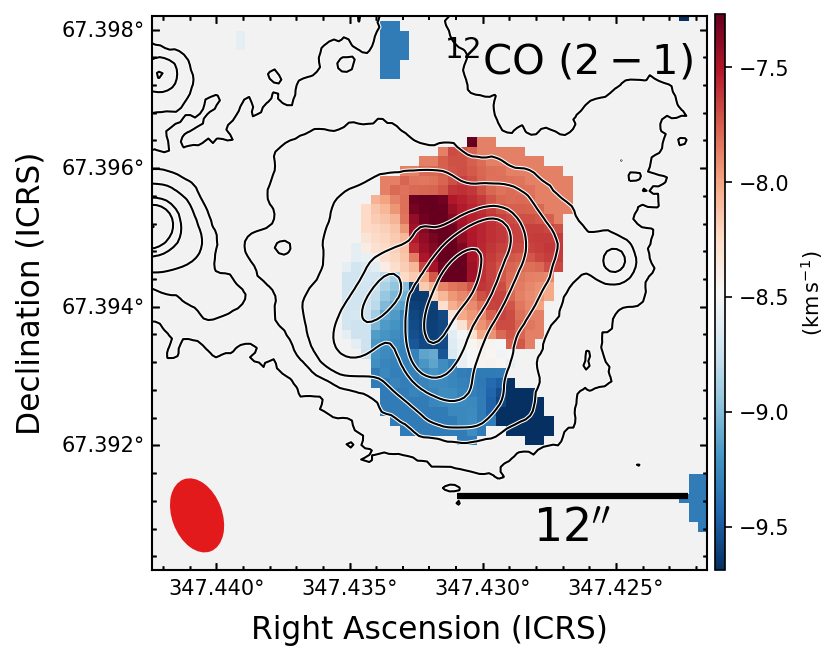

In [50]:
color_table='RdBu_r'
fig = plt.figure(dpi=150)

mom1_12CO = fits.open('/Users/kristina/Hamburgers/Draculas_Chivito/SMA/DraChi.briggs0.12CO.LSRK.im.image_v0.fits')

f_mom1_12CO = aplpy.FITSFigure(mom1_12CO, figure=fig)#, slices=[0],

vmin, vmax = np.nanpercentile(mom1_12CO[0].data, [2, 98])
f_mom1_12CO.show_colorscale(cmap=color_table, vmin=vmin, vmax=vmax) 

# adopt the default layout
figure_layout( f_mom1_12CO, c_unit='(m s$^{-1}$)', fontcolor='black', colorbar=False)

rms = 17.
c_levs = np.array([4, 16, 40, 160, 400, 1600])*rms
f_mom1_12CO.show_contour('/Users/kristina/Hamburgers/Draculas_Chivito/Pan-STARRS_fits_files/cutout_rings.v3.skycell.2537.088.stk.g.unconv.fits', colors='white', linewidths=2., levels=c_levs, smooth=3, kernel='box')
f_mom1_12CO.show_contour('/Users/kristina/Hamburgers/Draculas_Chivito/Pan-STARRS_fits_files/cutout_rings.v3.skycell.2537.088.stk.g.unconv.fits', colors='black', linewidths=1, levels=c_levs, smooth=3, kernel='box')


# got the coordinates of the center from CASAviewer
f_mom1_12CO.recenter(347.432,67.3942,width=0.008,height=0.008)

f_mom1_12CO.add_label(0.75,0.92, '$^{12}$CO $(2-1)$', relative=True, color='black', size=20)


im = plt.imshow(mom1_12CO[0].data/1000., cmap=color_table, vmin=vmin/1000, vmax=vmax/1000)
cb_ax = fig.add_axes([0.81, 0.11, 0.01, 0.772]) #right, top, thickness, length
cbar = fig.colorbar(im, cax=cb_ax)
cbar.set_label('$(\mathrm{km\,s^{-1}})$', fontsize=10)

fig.savefig('../plots/DraChi_mom1_12CO_PS1contours.pdf', bbox_inches='tight')




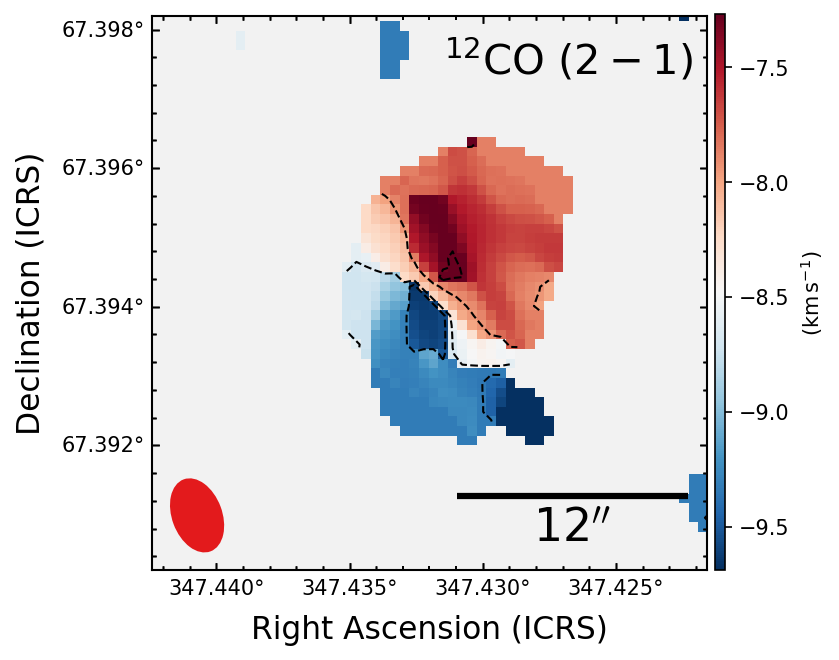

In [51]:
color_table='RdBu_r'
fig = plt.figure(dpi=150)

mom1_12CO = fits.open('/Users/kristina/Hamburgers/Draculas_Chivito/SMA/DraChi.briggs0.12CO.LSRK.im.image_v0.fits')

f_mom1_12CO = aplpy.FITSFigure(mom1_12CO, figure=fig)#, slices=[0],

vmin, vmax = np.nanpercentile(mom1_12CO[0].data, [2, 98])
f_mom1_12CO.show_colorscale(cmap=color_table, vmin=vmin, vmax=vmax) 

# adopt the default layout
figure_layout( f_mom1_12CO, c_unit='(m s$^{-1}$)', fontcolor='black', colorbar=False)

#max_em = -6.95e3 # m/s from mom1 map
#c_levs = np.arange(1.1,0.,-0.1)*max_em
#f_mom1_12CO.show_contour(mom1_12CO, colors='black', linewidths=1., levels=c_levs)

#max_em = -9.64e3 # m/s from mom1 map
#c_levs = np.arange(1.1,0.,-0.1)*max_em
#f_mom1_12CO.show_contour(mom1_12CO, colors='black', linewidths=1., levels=c_levs)

f_mom1_12CO.show_contour(colors='black', linewidths=1.)

# got the coordinates of the center from CASAviewer
f_mom1_12CO.recenter(347.432,67.3942,width=0.008,height=0.008)

f_mom1_12CO.add_label(0.75,0.92, '$^{12}$CO $(2-1)$', relative=True, color='black', size=20)


im = plt.imshow(mom1_12CO[0].data/1000., cmap=color_table, vmin=vmin/1000, vmax=vmax/1000)
cb_ax = fig.add_axes([0.81, 0.11, 0.01, 0.772]) #right, top, thickness, length
cbar = fig.colorbar(im, cax=cb_ax)
cbar.set_label('$(\mathrm{km\,s^{-1}})$', fontsize=10)

fig.savefig('../plots/DraChi_mom1_12CO_mom1contours.pdf', bbox_inches='tight')


## Plot channel map

In [52]:
def channel_map_layout( fig, rms, slice, label='', fontcolor='black', plot_xlabel=True, plot_ylabel=False, plot_cbar=False):
    fig.set_nan_color('0.95')
    
    # beam 
    fig.add_beam()
    fig.beam.set_color('#E31A1C')
        
    fig.axis_labels.set_font(size=6)
    fig.axis_labels.set_xtext('RA')
    fig.tick_labels.set_yformat('d.ddd')
    fig.axis_labels.set_ytext('DEC')
    fig.tick_labels.set_xformat('d.ddd')
    fig.axis_labels.set_ypad(pad=-1.5)
    
    fig.ticks.set_color(fontcolor)
    fig.ticks.set_tick_direction('in')
    fig.tick_labels.set_font(size=6)
    #fig.ticks.set_minor_frequency(2)
    fig.ticks.set_yspacing(0.002)  # degrees
    fig.ticks.set_xspacing(0.01)  # degrees
    
    fig.axis_labels.hide_x()
    fig.axis_labels.hide_y()
    
    if plot_xlabel==False:
        fig.tick_labels.hide_x()
        
    if plot_ylabel==False:
        fig.tick_labels.hide_y()
        
    if plot_cbar:
        fig.add_colorbar()
        fig.colorbar.set_location('right')
        fig.colorbar.set_width(0.05)
        fig.colorbar.set_pad(0.5)
        fig.colorbar.set_axis_label_text('(Jy beam$^{-1}$)')
        
    c_levs = np.array([3, 6, 12, 18])*rms
    fig.show_contour(cube_cont[slice].hdu, colors=fontcolor, linewidths=0.75, levels=c_levs)
    
    fig.add_label(0.67,0.9, label, relative=True, color=fontcolor, size=6)
    
    
    #f_mom0_12CO.show_contour(colors='black', linewidths=1., levels=c_levs)
    
    #fig.recenter(347.432,67.3942,radius=0.008)#width=0.008,height=0.008)
        
    ## Scale bar
    #ang_sep = (12*u.arcsec).to(u.rad)
    #fig.add_scalebar(ang_sep)
    #fig.scalebar.set_label("$12''$")
    #fig.scalebar.set_font(size=22)
    #fig.scalebar.set_linewidth(3) 
    #fig.scalebar.set_color(fontcolor)
    
   
    

### 1st: add keywords for beam to header

In [12]:
from astropy.utils.data import get_pkg_data_filename

cube_file = '/Users/kristina/Hamburgers/Draculas_Chivito/SMA/DraChi.briggs0.12CO.LSRK.im.image_modified_header.fits'

fits_file = get_pkg_data_filename(cube_file)
#fits.info(fits_file)

# got these values from the mom0 file...don't know why the cube doesn't have them
fits.setval(fits_file, 'BMAJ', value=0.001078328424029880)
fits.setval(fits_file, 'BMIN', value=0.000693414211273193)
fits.setval(fits_file, 'BPA', value=20.496504)

### 2nd: Zoom into the central region of the data cube

In [27]:
from astropy.wcs import wcs

data_file = fits.open(cube_file)[0]
data, header = data_file.data, data_file.header

# got this coordinates from Casaviewer
x_center = 347.432
y_center = 67.3941
w = wcs.WCS(header, naxis=(1,2))

print(w)

#Convert center value to pixel coordinates
pixcrd = w.wcs_world2pix(np.vstack((x_center,y_center)).T, 1)[0]
print(pixcrd)

print(w.wcs_pix2world(np.vstack((72.59639019, 72.64000047)).T,1))

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---SIN'  'DEC--SIN'  
CRVAL : 347.4318541667  67.39415  
CRPIX : 73.0  73.0  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.0001388888888889  0.0001388888888889  
NAXIS : 144  144  60  1
[72.59639019 72.64000047]
[[347.432   67.3941]]


In [14]:
from spectral_cube import SpectralCube

# 12CO J = 2−1 rest frequency (230.538 GHz) from Andrews+2018
# 2.305380000000E+11 /Rest Frequency (Hz) from fits-file header of 12CO cube
cube_cont = SpectralCube.read(cube_file, format='fits')
cube_cont = cube_cont.with_spectral_unit(unit=u.km/u.s, rest_value=230.538*u.GHz, velocity_convention='radio')
cube_cont._unit = u.Jy/u.beam

cube_cont

VaryingResolutionSpectralCube with shape=(60, 144, 144) and unit=Jy / beam:
 n_x:    144  type_x: RA---SIN  unit_x: deg    range:   347.406190 deg:  347.457880 deg
 n_y:    144  type_y: DEC--SIN  unit_y: deg    range:    67.384148 deg:   67.404009 deg
 n_s:     60  type_s: VRAD      unit_s: km / s  range:      -16.227 km / s:       5.202 km / s

In [15]:
import pyspeckit

#xwidth and ywidth are radii in pixel units of the data cube
cutout_cube = pyspeckit.cubes.subcube(cube_cont, xcen=pixcrd[0], ycen=pixcrd[1], xwidth=25, ywidth=25)


### 3rd: Plot channel map

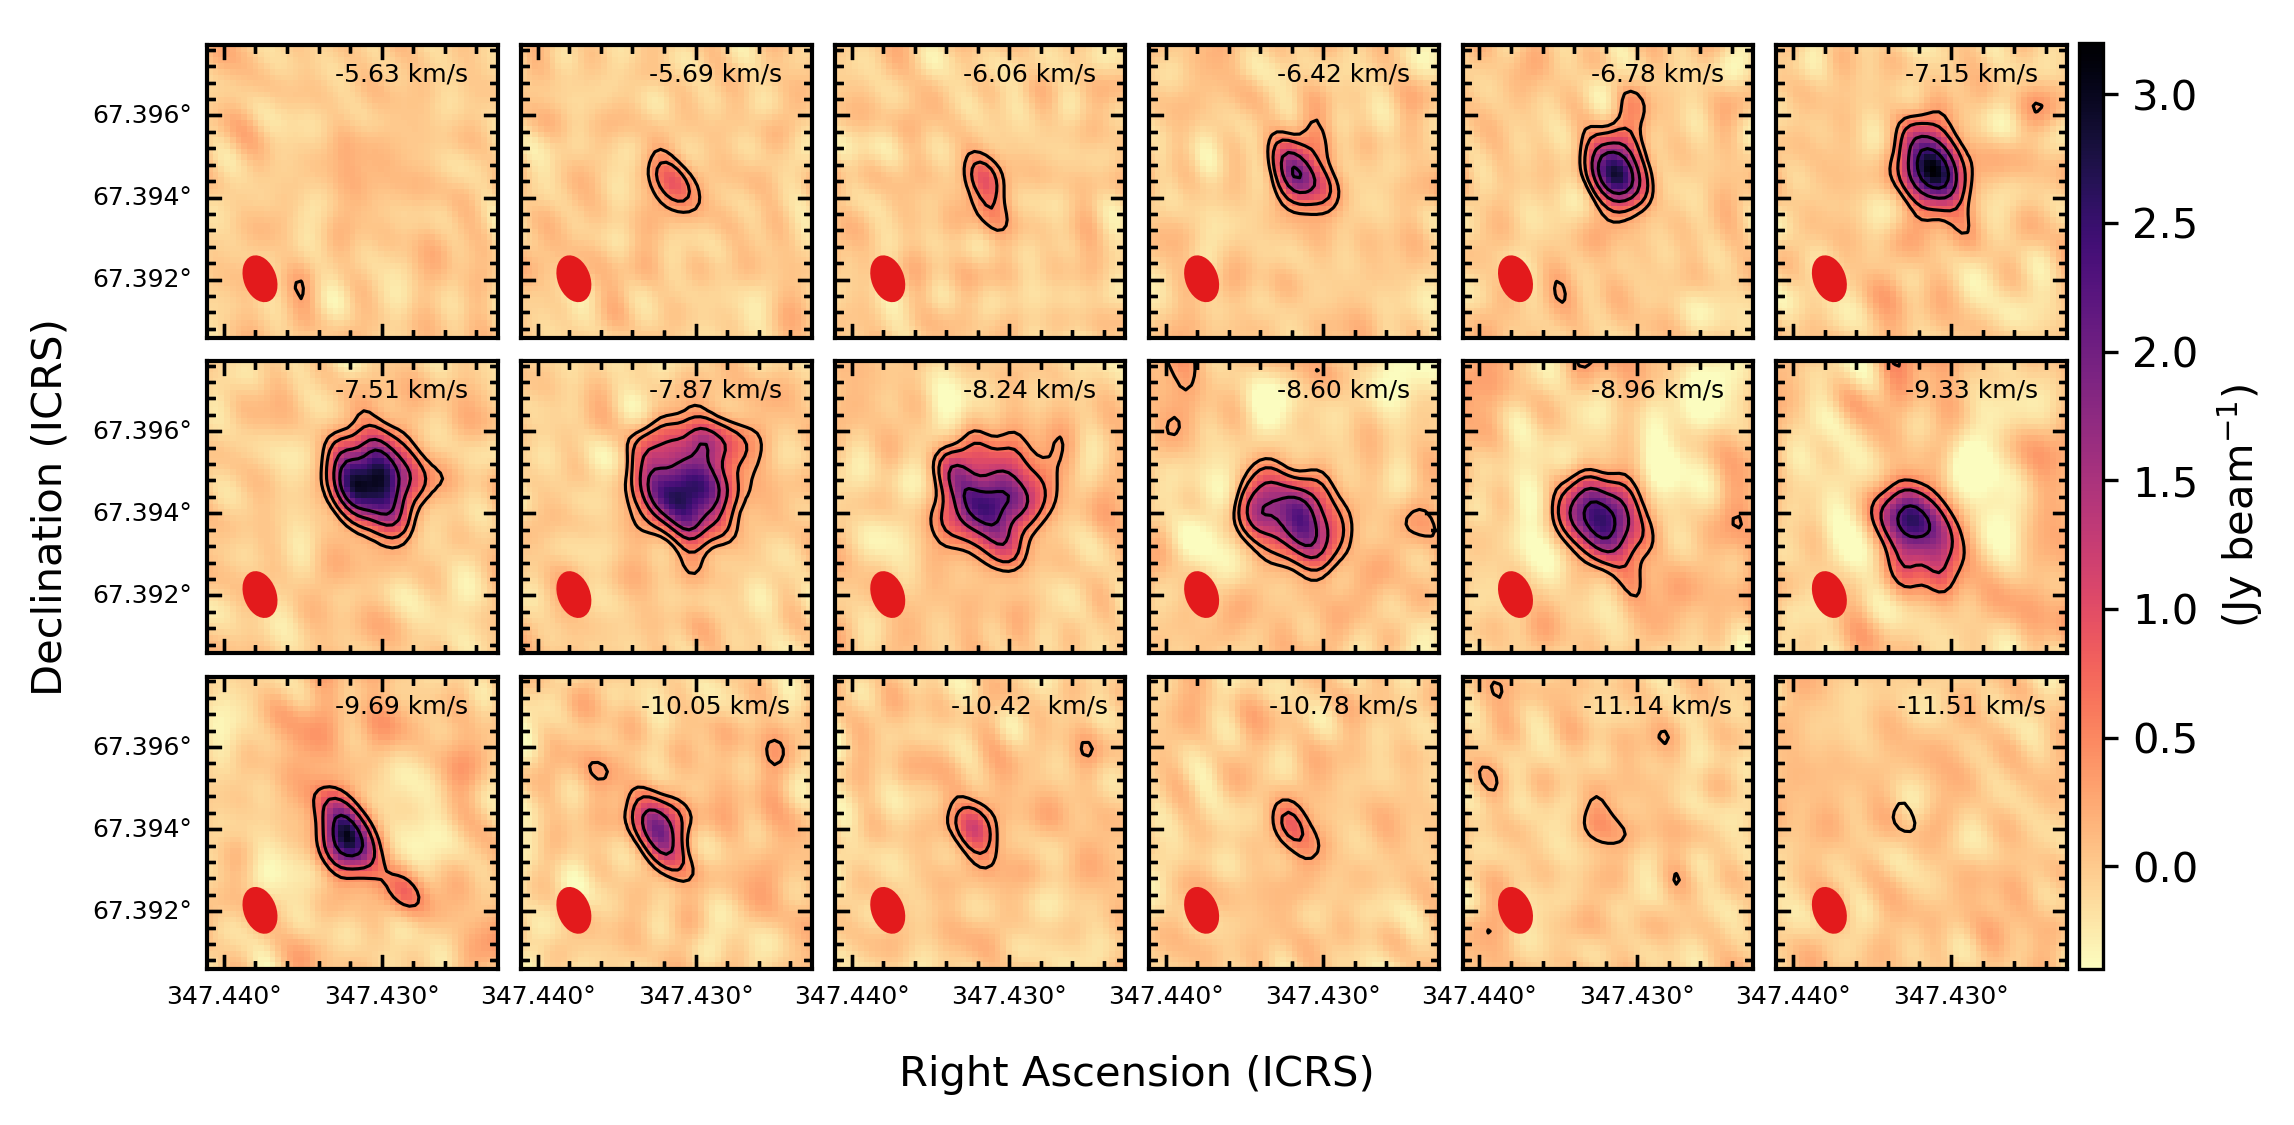

In [16]:
import matplotlib.gridspec as gridspec

fig = plt.figure(dpi=300, figsize=(8,4))

color_table='magma_r'


gridspec_layout = gridspec.GridSpec(3,6)
gridspec_layout.update(hspace=0.08, wspace=0.08)

### FIRST ROW
channel=29
f_cube_12CO_0 = aplpy.FITSFigure(cutout_cube.hdulist, slices=[channel], dimensions=[0,1], figure=fig, subplot=list(gridspec_layout[0].get_position(fig).bounds))
f_cube_12CO_0.show_colorscale(cmap=color_table, vmin=-0.4, vmax=3.5) 
channel_map_layout( f_cube_12CO_0, rms=1.14e-1, slice=channel, label='-5.63 km/s', fontcolor='black', plot_xlabel=False, plot_ylabel=True, plot_cbar=False)

channel=30
f_cube_12CO_1 = aplpy.FITSFigure(cutout_cube.hdulist, slices=[channel], dimensions=[0,1], figure=fig, subplot=list(gridspec_layout[1].get_position(fig).bounds))
f_cube_12CO_1.show_colorscale(cmap=color_table, vmin=-0.4, vmax=3.5) 
channel_map_layout( f_cube_12CO_1, rms=1.06e-1, slice=channel, label='-5.69 km/s', fontcolor='black', plot_xlabel=False, plot_ylabel=False, plot_cbar=False)

channel=31
f_cube_12CO_2 = aplpy.FITSFigure(cutout_cube.hdulist, slices=[channel], dimensions=[0,1], figure=fig, subplot=list(gridspec_layout[2].get_position(fig).bounds))
f_cube_12CO_2.show_colorscale(cmap=color_table, vmin=-0.4, vmax=3.5) 
channel_map_layout( f_cube_12CO_2, rms=1.14e-1, slice=channel, label='-6.06 km/s', fontcolor='black', plot_xlabel=False, plot_ylabel=False, plot_cbar=False)

channel=32
f_cube_12CO_3 = aplpy.FITSFigure(cutout_cube.hdulist, slices=[channel], dimensions=[0,1], figure=fig, subplot=list(gridspec_layout[3].get_position(fig).bounds))
f_cube_12CO_3.show_colorscale(cmap=color_table, vmin=-0.4, vmax=3.5) 
channel_map_layout( f_cube_12CO_3, rms=1.21e-1, slice=channel, label='-6.42 km/s', fontcolor='black', plot_xlabel=False, plot_ylabel=False, plot_cbar=False)

channel=33
f_cube_12CO_4 = aplpy.FITSFigure(cutout_cube.hdulist, slices=[channel], dimensions=[0,1], figure=fig, subplot=list(gridspec_layout[4].get_position(fig).bounds))
f_cube_12CO_4.show_colorscale(cmap=color_table, vmin=-0.4, vmax=3.5) 
channel_map_layout( f_cube_12CO_4, rms=1.12e-1, slice=channel, label='-6.78 km/s', fontcolor='black', plot_xlabel=False, plot_ylabel=False, plot_cbar=False)

channel=34
f_cube_12CO_5 = aplpy.FITSFigure(cutout_cube.hdulist, slices=[channel], dimensions=[0,1], figure=fig, subplot=list(gridspec_layout[5].get_position(fig).bounds))
f_cube_12CO_5.show_colorscale(cmap=color_table, vmin=-0.4, vmax=3.5) 
channel_map_layout( f_cube_12CO_5, rms=1.44e-1, slice=channel, label='-7.15 km/s', fontcolor='black', plot_xlabel=False, plot_ylabel=False, plot_cbar=False)

### SECOND ROW
channel=35
f_cube_12CO_6 = aplpy.FITSFigure(cutout_cube.hdulist, slices=[channel], dimensions=[0,1], figure=fig, subplot=list(gridspec_layout[6].get_position(fig).bounds))
f_cube_12CO_6.show_colorscale(cmap=color_table, vmin=-0.4, vmax=3.5) 
channel_map_layout( f_cube_12CO_6, rms=1.14e-1, slice=channel, label='-7.51 km/s', fontcolor='black', plot_xlabel=False, plot_ylabel=True, plot_cbar=False)

channel=36
f_cube_12CO_7 = aplpy.FITSFigure(cutout_cube.hdulist, slices=[channel], dimensions=[0,1], figure=fig, subplot=list(gridspec_layout[7].get_position(fig).bounds))
f_cube_12CO_7.show_colorscale(cmap=color_table, vmin=-0.4, vmax=3.5) 
channel_map_layout( f_cube_12CO_7, rms=9.79e-2, slice=channel, label='-7.87 km/s', fontcolor='black', plot_xlabel=False, plot_ylabel=False, plot_cbar=False)

channel=37
f_cube_12CO_8 = aplpy.FITSFigure(cutout_cube.hdulist, slices=[channel], dimensions=[0,1], figure=fig, subplot=list(gridspec_layout[8].get_position(fig).bounds))
f_cube_12CO_8.show_colorscale(cmap=color_table, vmin=-0.4, vmax=3.5) 
channel_map_layout( f_cube_12CO_8, rms=1.25e-1, slice=channel, label='-8.24 km/s', fontcolor='black', plot_xlabel=False, plot_ylabel=False, plot_cbar=False)

channel=38
f_cube_12CO_9 = aplpy.FITSFigure(cutout_cube.hdulist, slices=[channel], dimensions=[0,1], figure=fig, subplot=list(gridspec_layout[9].get_position(fig).bounds))
f_cube_12CO_9.show_colorscale(cmap=color_table, vmin=-0.4, vmax=3.5) 
channel_map_layout( f_cube_12CO_9, rms=1.01e-1, slice=channel, label='-8.60 km/s', fontcolor='black', plot_xlabel=False, plot_ylabel=False, plot_cbar=False)

channel=39
f_cube_12CO_10 = aplpy.FITSFigure(cutout_cube.hdulist, slices=[channel], dimensions=[0,1], figure=fig, subplot=list(gridspec_layout[10].get_position(fig).bounds))
f_cube_12CO_10.show_colorscale(cmap=color_table, vmin=-0.4, vmax=3.5) 
channel_map_layout( f_cube_12CO_10, rms=1.31e-1, slice=channel, label='-8.96 km/s', fontcolor='black', plot_xlabel=False, plot_ylabel=False, plot_cbar=False)

channel=40
f_cube_12CO_11 = aplpy.FITSFigure(cutout_cube.hdulist, slices=[channel], dimensions=[0,1], figure=fig, subplot=list(gridspec_layout[11].get_position(fig).bounds))
f_cube_12CO_11.show_colorscale(cmap=color_table, vmin=-0.4, vmax=3.5) 
channel_map_layout( f_cube_12CO_11, rms=1.96e-1, slice=channel, label='-9.33 km/s', fontcolor='black', plot_xlabel=False, plot_ylabel=False, plot_cbar=False)


### THIRD ROW
channel=41
f_cube_12CO_12 = aplpy.FITSFigure(cutout_cube.hdulist, slices=[channel], dimensions=[0,1], figure=fig, subplot=list(gridspec_layout[12].get_position(fig).bounds))
f_cube_12CO_12.show_colorscale(cmap=color_table, vmin=-0.4, vmax=3.5) 
channel_map_layout( f_cube_12CO_12, rms=1.92e-1, slice=channel, label='-9.69 km/s', fontcolor='black', plot_xlabel=True, plot_ylabel=True, plot_cbar=False)

channel=42
f_cube_12CO_13 = aplpy.FITSFigure(cutout_cube.hdulist, slices=[channel], dimensions=[0,1], figure=fig, subplot=list(gridspec_layout[13].get_position(fig).bounds))
f_cube_12CO_13.show_colorscale(cmap=color_table, vmin=-0.4, vmax=3.5) 
channel_map_layout( f_cube_12CO_13, rms=1.23e-1, slice=channel, label='-10.05 km/s', fontcolor='black', plot_xlabel=True, plot_ylabel=False, plot_cbar=False)

channel=43
f_cube_12CO_14 = aplpy.FITSFigure(cutout_cube.hdulist, slices=[channel], dimensions=[0,1], figure=fig, subplot=list(gridspec_layout[14].get_position(fig).bounds))
f_cube_12CO_14.show_colorscale(cmap=color_table, vmin=-0.4, vmax=3.5) 
channel_map_layout( f_cube_12CO_14, rms=1.12e-1, slice=channel, label='-10.42  km/s', fontcolor='black', plot_xlabel=True, plot_ylabel=False, plot_cbar=False)

channel=44
f_cube_12CO_15 = aplpy.FITSFigure(cutout_cube.hdulist, slices=[channel], dimensions=[0,1], figure=fig, subplot=list(gridspec_layout[15].get_position(fig).bounds))
f_cube_12CO_15.show_colorscale(cmap=color_table, vmin=-0.4, vmax=3.5) 
channel_map_layout( f_cube_12CO_15, rms=1.25e-1, slice=channel, label='-10.78 km/s', fontcolor='black', plot_xlabel=True, plot_ylabel=False, plot_cbar=False)

channel=45
f_cube_12CO_16 = aplpy.FITSFigure(cutout_cube.hdulist, slices=[channel], dimensions=[0,1], figure=fig, subplot=list(gridspec_layout[16].get_position(fig).bounds))
f_cube_12CO_16.show_colorscale(cmap=color_table, vmin=-0.4, vmax=3.5) 
channel_map_layout( f_cube_12CO_16, rms=9.06e-2, slice=channel, label='-11.14 km/s', fontcolor='black', plot_xlabel=True, plot_ylabel=False, plot_cbar=False)

channel=46
f_cube_12CO_17 = aplpy.FITSFigure(cutout_cube.hdulist, slices=[channel], dimensions=[0,1], figure=fig, subplot=list(gridspec_layout[17].get_position(fig).bounds))
f_cube_12CO_17.show_colorscale(cmap=color_table, vmin=-0.4, vmax=3.5) 
channel_map_layout( f_cube_12CO_17, rms=1.02e-1, slice=channel, label='-11.51 km/s', fontcolor='black', plot_xlabel=True, plot_ylabel=False, plot_cbar=False)

fig.subplots_adjust(wspace=0.05)
#fig.subplots_adjust(hspace=0.01)

#fig.subplots_adjust(right=0.8)
#cbar_ax = fig.add_axes([0.85, 0.085, 0.05, 0.7])
#fig.colorbar(f_cube_12CO_17, cax=cbar_ax)

# add an axes, lower left corner in [0.83, 0.08] measured in figure coordinate with axes width 0.02 and height 0.8

im = plt.imshow(cutout_cube[0].data, cmap=color_table, vmin=-0.4, vmax=3.2)
cb_ax = fig.add_axes([0.905, 0.11, 0.01, 0.772]) #right, top, thickness, length
cbar = fig.colorbar(im, cax=cb_ax)
cbar.set_label('(Jy beam$^{-1}$)', fontsize=10)

# add a big axis, hide frame
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axis
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
plt.xlabel("Right Ascension (ICRS)")
plt.ylabel("Declination (ICRS)", labelpad=10)

fig.savefig('../plots/DraChi_channel_12CO.pdf', bbox_inches='tight')


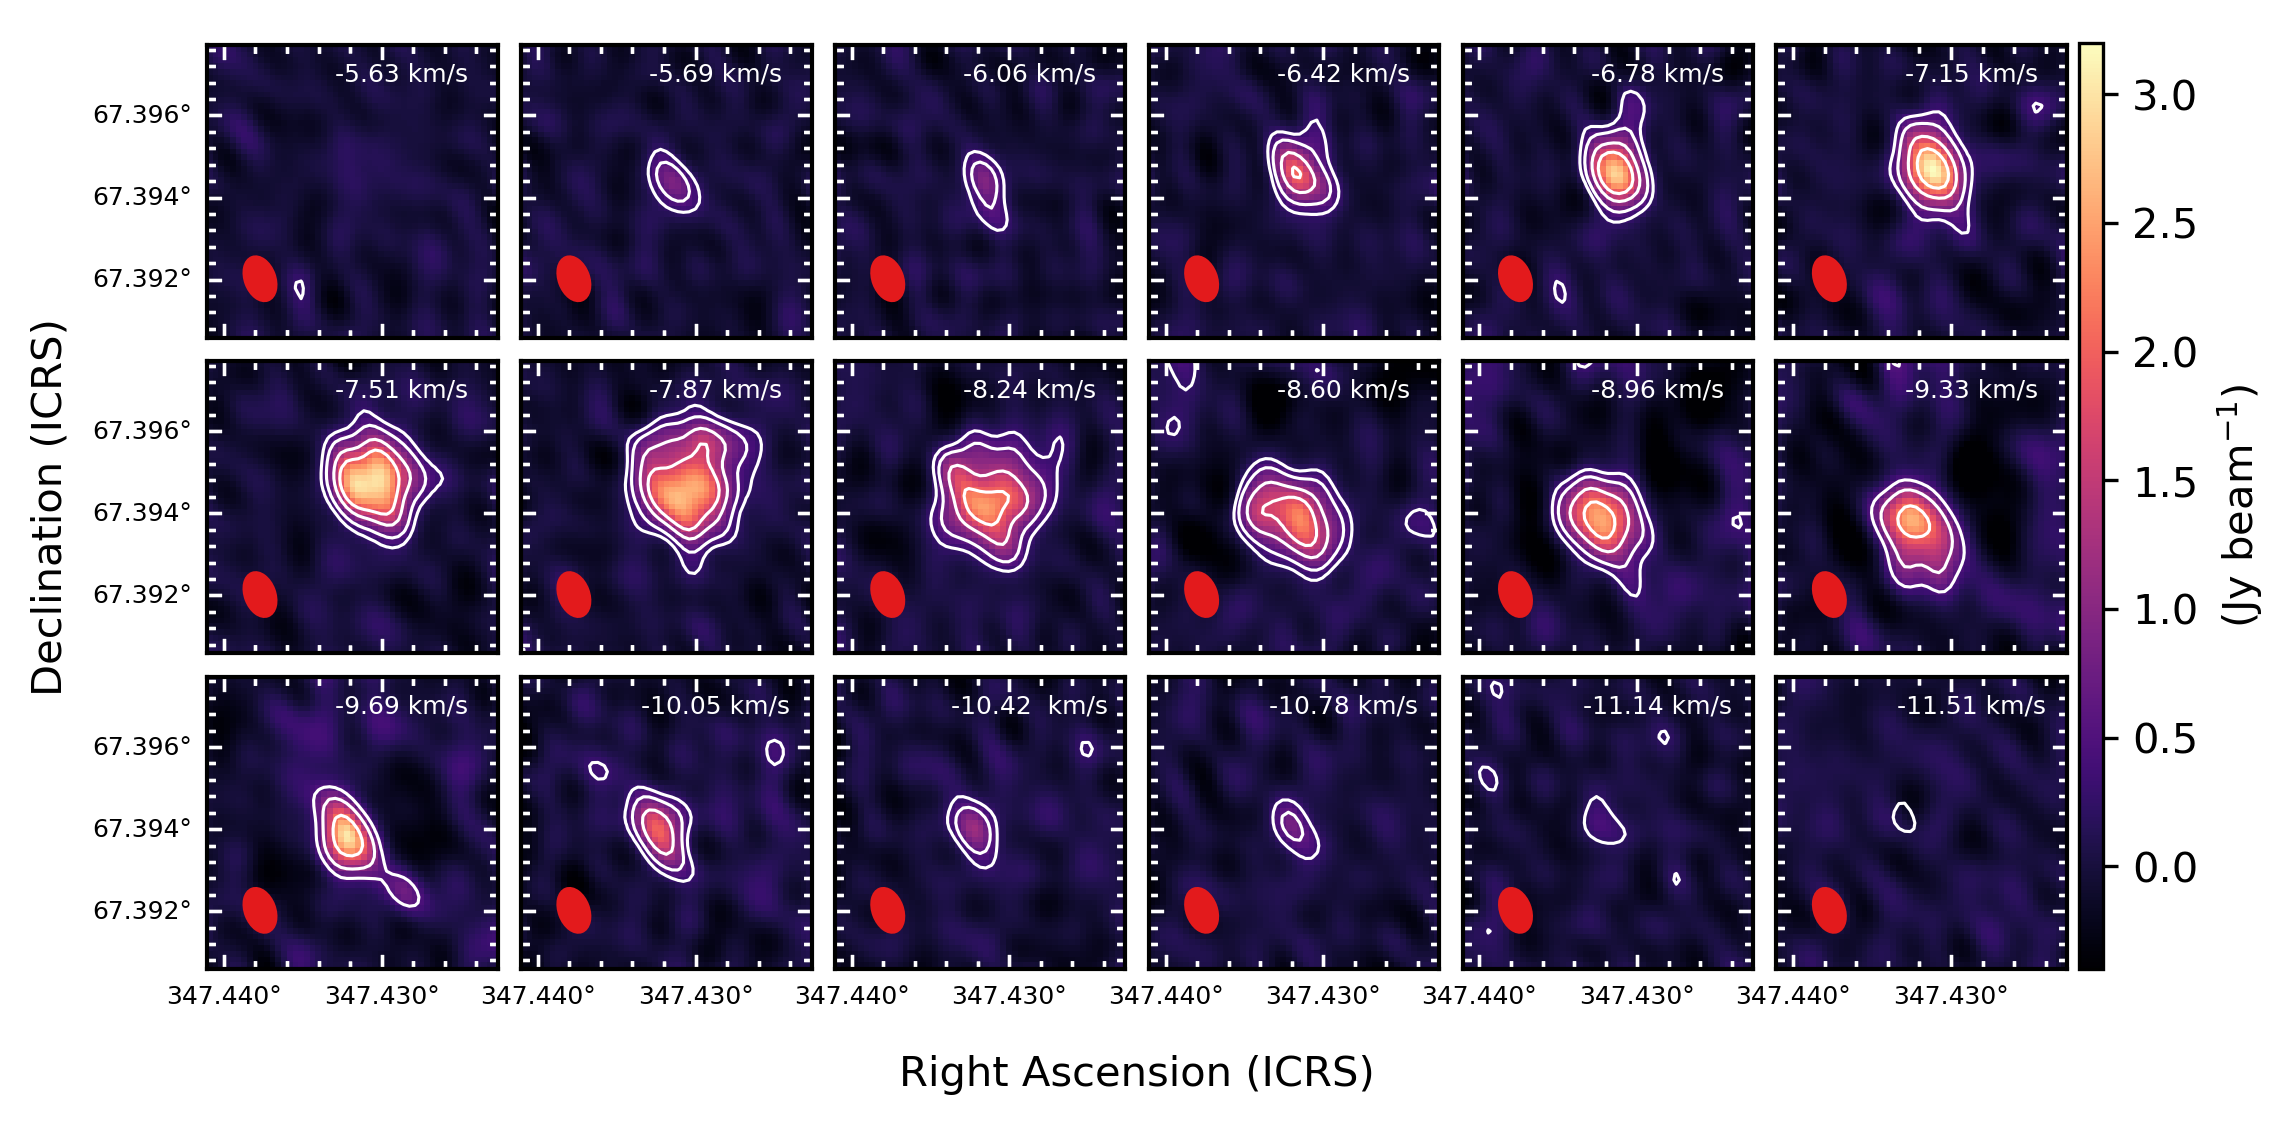

In [17]:
import matplotlib.gridspec as gridspec

fig = plt.figure(dpi=300, figsize=(8,4))

color_table='magma'


gridspec_layout = gridspec.GridSpec(3,6)
gridspec_layout.update(hspace=0.08, wspace=0.08)

### FIRST ROW
channel=29
f_cube_12CO_0 = aplpy.FITSFigure(cutout_cube.hdulist, slices=[channel], dimensions=[0,1], figure=fig, subplot=list(gridspec_layout[0].get_position(fig).bounds))
f_cube_12CO_0.show_colorscale(cmap=color_table, vmin=-0.4, vmax=3.5) 
channel_map_layout( f_cube_12CO_0, rms=1.14e-1, slice=channel, label='-5.63 km/s', fontcolor='white', plot_xlabel=False, plot_ylabel=True, plot_cbar=False)

channel=30
f_cube_12CO_1 = aplpy.FITSFigure(cutout_cube.hdulist, slices=[channel], dimensions=[0,1], figure=fig, subplot=list(gridspec_layout[1].get_position(fig).bounds))
f_cube_12CO_1.show_colorscale(cmap=color_table, vmin=-0.4, vmax=3.5) 
channel_map_layout( f_cube_12CO_1, rms=1.06e-1, slice=channel, label='-5.69 km/s', fontcolor='white', plot_xlabel=False, plot_ylabel=False, plot_cbar=False)

channel=31
f_cube_12CO_2 = aplpy.FITSFigure(cutout_cube.hdulist, slices=[channel], dimensions=[0,1], figure=fig, subplot=list(gridspec_layout[2].get_position(fig).bounds))
f_cube_12CO_2.show_colorscale(cmap=color_table, vmin=-0.4, vmax=3.5) 
channel_map_layout( f_cube_12CO_2, rms=1.14e-1, slice=channel, label='-6.06 km/s', fontcolor='white', plot_xlabel=False, plot_ylabel=False, plot_cbar=False)

channel=32
f_cube_12CO_3 = aplpy.FITSFigure(cutout_cube.hdulist, slices=[channel], dimensions=[0,1], figure=fig, subplot=list(gridspec_layout[3].get_position(fig).bounds))
f_cube_12CO_3.show_colorscale(cmap=color_table, vmin=-0.4, vmax=3.5) 
channel_map_layout( f_cube_12CO_3, rms=1.21e-1, slice=channel, label='-6.42 km/s', fontcolor='white', plot_xlabel=False, plot_ylabel=False, plot_cbar=False)

channel=33
f_cube_12CO_4 = aplpy.FITSFigure(cutout_cube.hdulist, slices=[channel], dimensions=[0,1], figure=fig, subplot=list(gridspec_layout[4].get_position(fig).bounds))
f_cube_12CO_4.show_colorscale(cmap=color_table, vmin=-0.4, vmax=3.5) 
channel_map_layout( f_cube_12CO_4, rms=1.12e-1, slice=channel, label='-6.78 km/s', fontcolor='white', plot_xlabel=False, plot_ylabel=False, plot_cbar=False)

channel=34
f_cube_12CO_5 = aplpy.FITSFigure(cutout_cube.hdulist, slices=[channel], dimensions=[0,1], figure=fig, subplot=list(gridspec_layout[5].get_position(fig).bounds))
f_cube_12CO_5.show_colorscale(cmap=color_table, vmin=-0.4, vmax=3.5) 
channel_map_layout( f_cube_12CO_5, rms=1.44e-1, slice=channel, label='-7.15 km/s', fontcolor='white', plot_xlabel=False, plot_ylabel=False, plot_cbar=False)

### SECOND ROW
channel=35
f_cube_12CO_6 = aplpy.FITSFigure(cutout_cube.hdulist, slices=[channel], dimensions=[0,1], figure=fig, subplot=list(gridspec_layout[6].get_position(fig).bounds))
f_cube_12CO_6.show_colorscale(cmap=color_table, vmin=-0.4, vmax=3.5) 
channel_map_layout( f_cube_12CO_6, rms=1.14e-1, slice=channel, label='-7.51 km/s', fontcolor='white', plot_xlabel=False, plot_ylabel=True, plot_cbar=False)

channel=36
f_cube_12CO_7 = aplpy.FITSFigure(cutout_cube.hdulist, slices=[channel], dimensions=[0,1], figure=fig, subplot=list(gridspec_layout[7].get_position(fig).bounds))
f_cube_12CO_7.show_colorscale(cmap=color_table, vmin=-0.4, vmax=3.5) 
channel_map_layout( f_cube_12CO_7, rms=9.79e-2, slice=channel, label='-7.87 km/s', fontcolor='white', plot_xlabel=False, plot_ylabel=False, plot_cbar=False)

channel=37
f_cube_12CO_8 = aplpy.FITSFigure(cutout_cube.hdulist, slices=[channel], dimensions=[0,1], figure=fig, subplot=list(gridspec_layout[8].get_position(fig).bounds))
f_cube_12CO_8.show_colorscale(cmap=color_table, vmin=-0.4, vmax=3.5) 
channel_map_layout( f_cube_12CO_8, rms=1.25e-1, slice=channel, label='-8.24 km/s', fontcolor='white', plot_xlabel=False, plot_ylabel=False, plot_cbar=False)

channel=38
f_cube_12CO_9 = aplpy.FITSFigure(cutout_cube.hdulist, slices=[channel], dimensions=[0,1], figure=fig, subplot=list(gridspec_layout[9].get_position(fig).bounds))
f_cube_12CO_9.show_colorscale(cmap=color_table, vmin=-0.4, vmax=3.5) 
channel_map_layout( f_cube_12CO_9, rms=1.01e-1, slice=channel, label='-8.60 km/s', fontcolor='white', plot_xlabel=False, plot_ylabel=False, plot_cbar=False)

channel=39
f_cube_12CO_10 = aplpy.FITSFigure(cutout_cube.hdulist, slices=[channel], dimensions=[0,1], figure=fig, subplot=list(gridspec_layout[10].get_position(fig).bounds))
f_cube_12CO_10.show_colorscale(cmap=color_table, vmin=-0.4, vmax=3.5) 
channel_map_layout( f_cube_12CO_10, rms=1.31e-1, slice=channel, label='-8.96 km/s', fontcolor='white', plot_xlabel=False, plot_ylabel=False, plot_cbar=False)

channel=40
f_cube_12CO_11 = aplpy.FITSFigure(cutout_cube.hdulist, slices=[channel], dimensions=[0,1], figure=fig, subplot=list(gridspec_layout[11].get_position(fig).bounds))
f_cube_12CO_11.show_colorscale(cmap=color_table, vmin=-0.4, vmax=3.5) 
channel_map_layout( f_cube_12CO_11, rms=1.96e-1, slice=channel, label='-9.33 km/s', fontcolor='white', plot_xlabel=False, plot_ylabel=False, plot_cbar=False)


### THIRD ROW
channel=41
f_cube_12CO_12 = aplpy.FITSFigure(cutout_cube.hdulist, slices=[channel], dimensions=[0,1], figure=fig, subplot=list(gridspec_layout[12].get_position(fig).bounds))
f_cube_12CO_12.show_colorscale(cmap=color_table, vmin=-0.4, vmax=3.5) 
channel_map_layout( f_cube_12CO_12, rms=1.92e-1, slice=channel, label='-9.69 km/s', fontcolor='white', plot_xlabel=True, plot_ylabel=True, plot_cbar=False)

channel=42
f_cube_12CO_13 = aplpy.FITSFigure(cutout_cube.hdulist, slices=[channel], dimensions=[0,1], figure=fig, subplot=list(gridspec_layout[13].get_position(fig).bounds))
f_cube_12CO_13.show_colorscale(cmap=color_table, vmin=-0.4, vmax=3.5) 
channel_map_layout( f_cube_12CO_13, rms=1.23e-1, slice=channel, label='-10.05 km/s', fontcolor='white', plot_xlabel=True, plot_ylabel=False, plot_cbar=False)

channel=43
f_cube_12CO_14 = aplpy.FITSFigure(cutout_cube.hdulist, slices=[channel], dimensions=[0,1], figure=fig, subplot=list(gridspec_layout[14].get_position(fig).bounds))
f_cube_12CO_14.show_colorscale(cmap=color_table, vmin=-0.4, vmax=3.5) 
channel_map_layout( f_cube_12CO_14, rms=1.12e-1, slice=channel, label='-10.42  km/s', fontcolor='white', plot_xlabel=True, plot_ylabel=False, plot_cbar=False)

channel=44
f_cube_12CO_15 = aplpy.FITSFigure(cutout_cube.hdulist, slices=[channel], dimensions=[0,1], figure=fig, subplot=list(gridspec_layout[15].get_position(fig).bounds))
f_cube_12CO_15.show_colorscale(cmap=color_table, vmin=-0.4, vmax=3.5) 
channel_map_layout( f_cube_12CO_15, rms=1.25e-1, slice=channel, label='-10.78 km/s', fontcolor='white', plot_xlabel=True, plot_ylabel=False, plot_cbar=False)

channel=45
f_cube_12CO_16 = aplpy.FITSFigure(cutout_cube.hdulist, slices=[channel], dimensions=[0,1], figure=fig, subplot=list(gridspec_layout[16].get_position(fig).bounds))
f_cube_12CO_16.show_colorscale(cmap=color_table, vmin=-0.4, vmax=3.5) 
channel_map_layout( f_cube_12CO_16, rms=9.06e-2, slice=channel, label='-11.14 km/s', fontcolor='white', plot_xlabel=True, plot_ylabel=False, plot_cbar=False)

channel=46
f_cube_12CO_17 = aplpy.FITSFigure(cutout_cube.hdulist, slices=[channel], dimensions=[0,1], figure=fig, subplot=list(gridspec_layout[17].get_position(fig).bounds))
f_cube_12CO_17.show_colorscale(cmap=color_table, vmin=-0.4, vmax=3.5) 
channel_map_layout( f_cube_12CO_17, rms=1.02e-1, slice=channel, label='-11.51 km/s', fontcolor='white', plot_xlabel=True, plot_ylabel=False, plot_cbar=False)

fig.subplots_adjust(wspace=0.05)
#fig.subplots_adjust(hspace=0.01)

#fig.subplots_adjust(right=0.8)
#cbar_ax = fig.add_axes([0.85, 0.085, 0.05, 0.7])
#fig.colorbar(f_cube_12CO_17, cax=cbar_ax)

# add an axes, lower left corner in [0.83, 0.08] measured in figure coordinate with axes width 0.02 and height 0.8

im = plt.imshow(cutout_cube[0].data, cmap=color_table, vmin=-0.4, vmax=3.2)
cb_ax = fig.add_axes([0.905, 0.11, 0.01, 0.772]) #right, top, thickness, length
cbar = fig.colorbar(im, cax=cb_ax)
cbar.set_label('(Jy beam$^{-1}$)', fontsize=10)

# add a big axis, hide frame
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axis
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
plt.xlabel("Right Ascension (ICRS)")
plt.ylabel("Declination (ICRS)", labelpad=10)

fig.savefig('../plots/DraChi_channel_12CO_2.pdf', bbox_inches='tight')
